In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
dataset = pd.read_csv('data/SaratogaHouses.csv')

In [3]:
livingArea = dataset['livingArea']
landValue = dataset['landValue']
rooms = dataset['rooms']
centralAir = dataset['centralAir']
price = dataset['price']

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
encoder = LabelEncoder()
centralAir = encoder.fit_transform(centralAir)

In [6]:
from sklearn.preprocessing import StandardScaler

In [17]:
n = len(price)
X0 = np.ones(n)
X = np.array([X0, livingArea, landValue, rooms, centralAir]).T
y = np.array(price)
B = np.zeros(5)

In [18]:
std = StandardScaler()
X = std.fit_transform(X)

In [19]:
y = y.reshape(y.shape[0],1)
y = std.fit_transform(y)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [20]:
X[:10]

array([[ 0.        , -1.36985441,  0.44108417, -0.88163155, -0.76221375],
       [ 0.        ,  0.31951971, -0.350095  , -0.44981202, -0.76221375],
       [ 0.        ,  0.30499787, -0.77853137,  0.41382706, -0.76221375],
       [ 0.        ,  0.30499787, -0.45291972, -0.88163155, -0.76221375],
       [ 0.        , -1.47634791, -0.5586007 , -1.74527063,  1.31196793],
       [ 0.        , -0.9729241 , -0.58716312,  0.41382706, -0.76221375],
       [ 0.        ,  1.60873645, -0.32153257,  0.41382706, -0.76221375],
       [ 0.        , -0.1500198 , -0.57002567,  0.84564659, -0.76221375],
       [ 0.        , -0.19842594, -0.35295124,  0.41382706, -0.76221375],
       [ 0.        , -0.54695011, -0.38151366, -0.44981202, -0.76221375]])

In [21]:
def cost_function(X,y,B):
    h = np.sum((X.dot(B) - y) ** 2) / (2 * n)
    return h

In [22]:
cost_function(X,y,B)

864.0000000000001

In [23]:
def gradient_descent(X,y,B,epoch,alpha):
    cost_history = [0] * epoch
    
    for i in range(epoch):
        y_pred = X.dot(B)
        loss = y_pred - y
        gradient = X.T.dot(loss) / n
        B = B - alpha * gradient
        cost_history[i] = cost_function(X,y,B)
#         print(i, cost_history[i])
    
    return cost_history, B

In [24]:
cost, b = gradient_descent(X,y.flatten(),B,epoch=2000,alpha=0.001)

In [25]:
b

array([0.        , 0.38045592, 0.3160429 , 0.16668651, 0.12626538])

In [26]:
import matplotlib.pyplot as plt

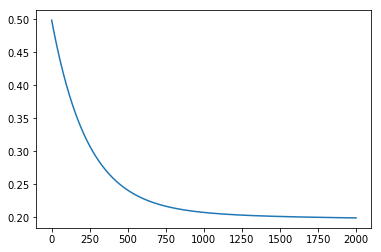

In [27]:
X1 = [i for i in range(2000)]
plt.plot(X1,cost)